In [18]:

import numpy as np
import pandas as pd

In [19]:
# Load the dataset
data = pd.read_csv('C:/Users/hamza/OneDrive/Desktop/FYP2/Heart_disease.csv')

# Preview the first few rows
print(data.head())

# Get dataset shape
print(f"Dataset shape: {data.shape}")

# Summary of dataset columns, data types, and non-null values
print(data.info())

# Basic statistical summary for numerical columns
print(data.describe())

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  I

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


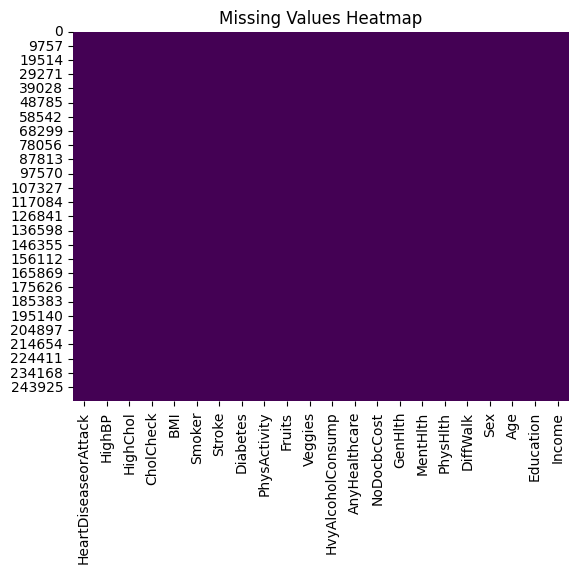

KeyError: 'column_name'

In [20]:
# Check for missing values
print(data.isnull().sum())

# Visualize missing values (optional)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# If missing values exist, handle them:
# For numerical columns, fill with mean or median:
data['column_name'].fillna(data['column_name'].mean(), inplace=True)

# For categorical columns, fill with the mode:
data['column_name'].fillna(data['column_name'].mode()[0], inplace=True)


HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64


C:\Users\hamza\AppData\Local\Temp\ipykernel_16316\2898469219.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='HeartDiseaseorAttack', palette='viridis')


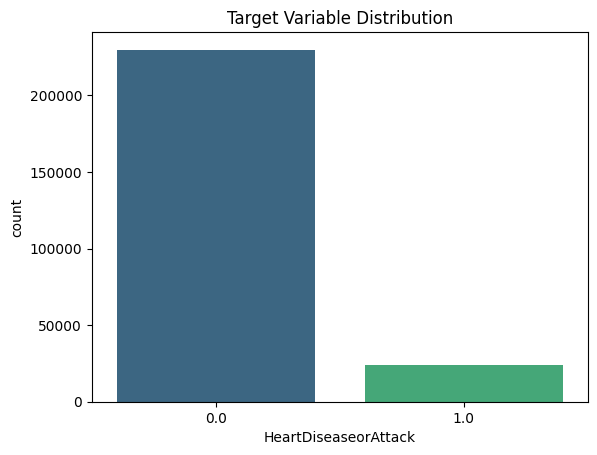

In [21]:
# Check class distribution
print(data['HeartDiseaseorAttack'].value_counts())

# Visualize class distribution
sns.countplot(data=data, x='HeartDiseaseorAttack', palette='viridis')
plt.title("Target Variable Distribution")
plt.show()


In [11]:
print("Training set size (X_train):", len(X_train))
print("Testing set size (X_test):", len(X_test))
print("Training set size (y_train):", len(y_train))
print("Testing set size (y_test):", len(y_test))


Training set size (X_train): 368452
Testing set size (X_test): 92113
Training set size (y_train): 368452
Testing set size (y_test): 92113


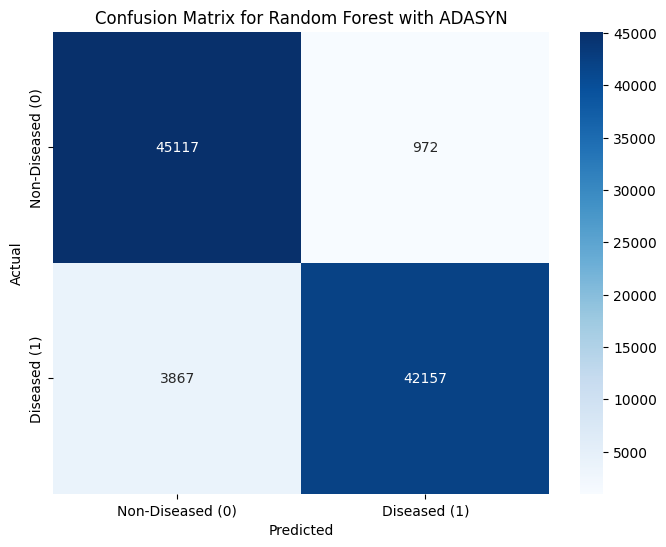

ADASYN Random Forest Performance:
Accuracy: 0.9475
MCC: 0.8967
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     46089
         1.0       0.98      0.92      0.95     46024

    accuracy                           0.95     92113
   macro avg       0.95      0.95      0.95     92113
weighted avg       0.95      0.95      0.95     92113

Sensitivity: 0.9160
Specificity: 0.9789
Time taken for training: 56.4404 seconds


In [1]:
# RANDOM FOREST
import pandas as pd
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load dataset
data = pd.read_csv('Heart_disease.csv')
target = "HeartDiseaseorAttack"

# Split the data into features and target
x = data.drop(target, axis=1)  # Features
y = data[target]  # Target variable

# Apply ADASYN for oversampling
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
x_resampled, y_resampled = adasyn.fit_resample(x, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)

# Start timing the training process
start_time = time.time()

# Fit the model
rf_classifier.fit(X_train, y_train)

# End timing
training_time = time.time() - start_time

# Predict on test data
y_pred_rf = rf_classifier.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diseased (0)', 'Diseased (1)'], yticklabels=['Non-Diseased (0)', 'Diseased (1)'])
plt.title('Confusion Matrix for Random Forest with ADASYN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate Sensitivity (Recall) and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Evaluate Random Forest
accuracy = accuracy_score(y_test, y_pred_rf)
mcc = matthews_corrcoef(y_test, y_pred_rf)

print("ADASYN Random Forest Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"MCC: {mcc:.4f}")  # Display MCC
print(classification_report(y_test, y_pred_rf))
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Time taken for training: {training_time:.4f} seconds")  # Display training time


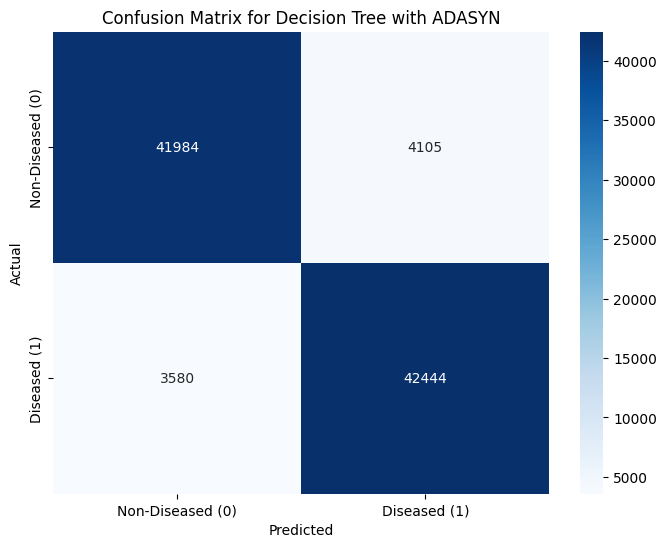

ADASYN Decision Tree Performance:
Accuracy: 0.9166
MCC: 0.8332
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     46089
         1.0       0.91      0.92      0.92     46024

    accuracy                           0.92     92113
   macro avg       0.92      0.92      0.92     92113
weighted avg       0.92      0.92      0.92     92113

Sensitivity (Decision Tree): 0.9222
Specificity (Decision Tree): 0.9109
Time taken for training: 3.2372 seconds


In [1]:
# Decision Tree
import pandas as pd
from imblearn.over_sampling import ADASYN
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load dataset
data = pd.read_csv('Heart_disease.csv')
target = "HeartDiseaseorAttack"

# Split the data into features and target
x = data.drop(target, axis=1)  # Features
y = data[target]  # Target variable

# Apply ADASYN for oversampling
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
x_resampled, y_resampled = adasyn.fit_resample(x, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Start timing the training process
start_time = time.time()

# Fit the model
dt_classifier.fit(X_train, y_train)

# End timing
training_time = time.time() - start_time

# Predict on test data
y_pred_dt = dt_classifier.predict(X_test)

# Compute the confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diseased (0)', 'Diseased (1)'], yticklabels=['Non-Diseased (0)', 'Diseased (1)'])
plt.title('Confusion Matrix for Decision Tree with ADASYN')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN) for Decision Tree
TP_dt = cm_dt[1, 1]
TN_dt = cm_dt[0, 0]
FP_dt = cm_dt[0, 1]
FN_dt = cm_dt[1, 0]

# Calculate Sensitivity (Recall) and Specificity for Decision Tree
sensitivity_dt = TP_dt / (TP_dt + FN_dt)
specificity_dt = TN_dt / (TN_dt + FP_dt)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)

print("ADASYN Decision Tree Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"MCC: {mcc_dt:.4f}")  # Display MCC
print(classification_report(y_test, y_pred_dt))
print(f"Sensitivity (Decision Tree): {sensitivity_dt:.4f}")
print(f"Specificity (Decision Tree): {specificity_dt:.4f}")
print(f"Time taken for training: {training_time:.4f} seconds")  # Display training time
